In [1]:
from __future__ import print_function, division
__author__ = 'fbb' # CUSP PUI 2017

In [2]:
import pandas as pd
import pylab as pl
import scipy.stats as spst
%pylab inline
pl.rcParams['font.size'] = 20

Populating the interactive namespace from numpy and matplotlib


**Is the new Bus route improving commute?**

A new bus route for line X8 is implemented. MTA wants to know if it improves commute time (travel time at peak hours).

They know what the mean and standard deviation of the travel time used to be, and measure the new travel time 100 times. The data is in 
https://raw.githubusercontent.com/fedhere/PUI2016_fb55/master/Lab3_fb55/times.txt

## Null Hypothesis Statistical Test NHST
### Null hypothesis testing problem formulation:
**Null Hypothesis:**
new bus route does not change travel time
$$ H_0: Told - Tnew = 0 $$
**Alternative Hypothesis:**
new bus route does change travel time
$$ H_a: |Told - Tnew| > 0 $$
** Significance: alpha = 0.05**



In [9]:
#assume old distribution is a "population" and it is Gaussian distributed
oldMean = 36.
oldStd = 6.


In [10]:
newTimes = pd.read_csv("https://raw.githubusercontent.com/fedhere/PUI2017_fb55/master/Lab3_fb55/times.txt", header=None)
newMean = newTimes.values.mean()
newStd = newTimes.values.std()
N = len(newTimes)
print ("new trip duration:\nnumber of trips measured N = {0},\nmean time:  {1:.2f} minutes,\nstandard deviation: {2:.2f} minutes".format(
    N, newMean, newStd))

new trip duration:
number of trips measured N = 100,
mean time:  34.47 minutes,
standard deviation: 7.10 minutes


### Z test:
tests a difference between means. 
$$ Z = \frac{|M - \mu|}{\frac{\sigma}{\sqrt(N)}} $$



In [11]:
z = np.abs(oldMean - newMean) / (oldStd / np.sqrt(N))
print ("Z statistics\nZ = {0:.2f}".format(z))

Z statistics
Z = 2.56


This is in units of standard deviations (sort of)! 
    - 0.05 is 2 standard deviations
    - 2.56 > 2 so I am farther than 2 standard deviations from the mean. 
(in reality for a 2-tailed test the threshold for 0.05 significance is 1.96, not 2)
    
** We reject the null hypothesis, p-value *p* < 0.05 **    

## effect size

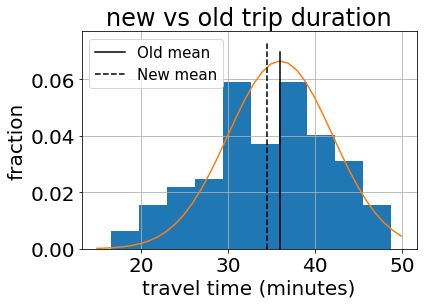

In [12]:
fig, ax = pl.subplots(1)
tBins = newTimes.hist(ax=ax, normed=True)
ax.set_xlabel("travel time (minutes)")
ax.set_ylabel("fraction")
ax.set_title("new vs old trip duration")
xline = np.arange(*ax.get_xlim())

ax.plot(xline, spst.distributions.norm.pdf(xline, loc=oldMean, scale=oldStd))

ax.plot([oldMean, oldMean], [0, ax.get_ylim()[1]], 'k-', label="Old mean")
ax.plot([newMean, newMean], [0, ax.get_ylim()[1]], 'k--', label="New mean")
ax.legend(fontsize=15);

** Figure 1: **
caption: the observed distribution of travel times after rerouting is plotted as a histogram (blue). The distribution of travel times before rerouting us plotted as a Gaussian with mean 36 minutes and standard deviation 6 minutes. The means are indicated by a solid and a dashed black line, respectively.
While the distributions are different according to a Z test the difference in the mean appears small. 

Z test Cohen_d:
$$ d = \frac{|M - \mu|}{\bar{\sigma}} $$

In [13]:
meanSigma = (oldStd + newStd) * 0.5
d = np.abs(oldMean - newMean) / meanSigma
print ('The effect size d is {0:.2f}'.format(d))

The effect size d is 0.23


** Although there is a statistically significant difference, the effect size is 0.23. According to Cohen (1960)'s prescriptions  the effect size is *small* **